## Heart diseases



- predicting potential Heart Diseases in people using Machine Learning algorithms  

Predictind heart diseases in advance, can provide important insights to doctors who can then adapt their diagnosis and treatment per patient basis.


In [1]:
# import libraries 
import pandas as pd
import numpy as np
import sklearn


import matplotlib.pyplot as plt
# from matplotlib import rcParams
# from matplotlib.cm import rainbow

import seaborn as sns

%matplotlib inline

# import functions directly from sci-kit learn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#preprocessing functions will be used to standardize/normalize data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


In [2]:
# read in our dataset
filePath = "datasets/HeartDataset.csv"
df = pd.read_csv(filePath)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Exploratory Analysis

In [3]:
df.shape

(1025, 14)

In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
# rename the coulmns for beter understande  

df.columns = ['Age','Sex','ChestPain','RestingBloodPressure', 'Cholestoral','FastingBloodSugar',
              'CardiographicResults','MaximumHeartRate','ExerciseInducedAngina', 'Depression','Slope','MajorVessels',
              'Thalassemia','Target']
df.head(20)

,Age,Sex,ChestPain,RestingBloodPressure,Cholestoral,FastingBloodSugar,CardiographicResults,MaximumHeartRate,ExerciseInducedAngina,Depression,Slope,MajorVessels,Thalassemia,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [7]:
df.describe()

,Age,Sex,ChestPain,RestingBloodPressure,Cholestoral,FastingBloodSugar,CardiographicResults,MaximumHeartRate,ExerciseInducedAngina,Depression,Slope,MajorVessels,Thalassemia,Target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Data Describtions

- 'age':  age betoween 29 to 77 years old

- 'sex':  sex (1 = male; 0 = female)

- 'cp': chest pain type (4 values) (? we need more info) from UCI:

-- Value 1: typical angina

-- Value 2: atypical angina

-- Value 3: non-anginal pain

-- Value 4: asymptomatic


- 'trestbps': resting blood pressure(in mm Hg on admission to the hospital) ( lowest 94 and highest 200) 

- 'chol': serum cholestoral in mg/dl

- 'fbs' : fasting blood sugar > 120 mg/dl(1 = true; 0 = false)

- 'restecg' : resting electro cardiographic results (values 0,1,2) (? we need more info) from UCI:

-- Value 0: normal

-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria


- 'thalach': maximum heart rate achieved  between 71 and 202

- 'exang': exercise induced angina (1 = yes; 0 = no) ( chest pain or pressure due to not enough blood flow to thr heart)

- 'oldpeak': oldpeak = ST depression induced by exercise relative to rest

- 'slope': the slope of the peak exercise ST segment

- 'ca': number of major vessels (0-3) colored by flourosopy (need to know more)

- 'thal': thal: 0 = normal; 1 = fixed defect; 2 = reversable defect (Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal.)

- 'target': The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

In [8]:
# check ro missing values
df.isnull().sum()

Age                      0
Sex                      0
ChestPain                0
RestingBloodPressure     0
Cholestoral              0
FastingBloodSugar        0
CardiographicResults     0
MaximumHeartRate         0
ExerciseInducedAngina    0
Depression               0
Slope                    0
MajorVessels             0
Thalassemia              0
Target                   0
dtype: int64

 **There are a total of 13 features and 1 target variable. Also, there are no missing values so we don’t need to take care of any null values.**

###  Bar Plot for Target Class

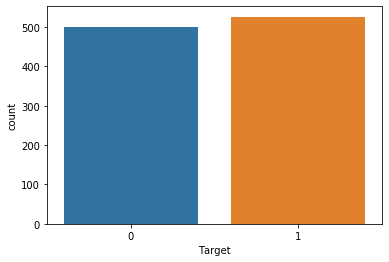

In [9]:
# distribution of our target varible
sns.countplot(df['Target'])

**From the plot, we can see that the classes are almost balanced** 

### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025C344052C8>,
      dtype=object)

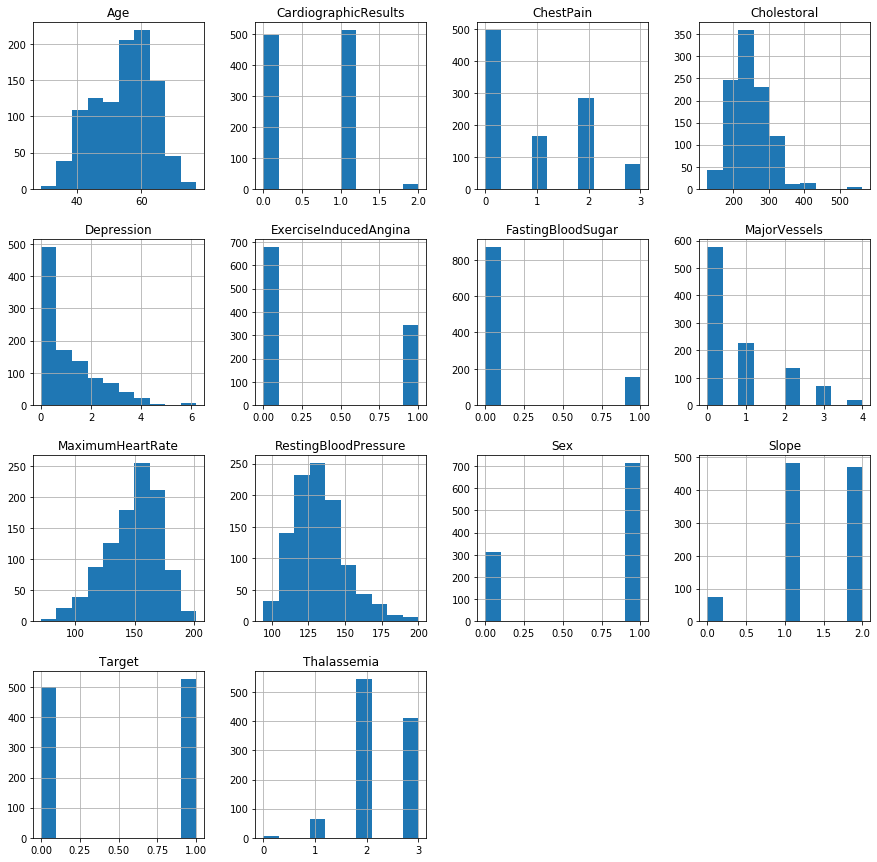

In [10]:
#plot the frequency count for each column
df.hist(figsize=(15,15))

**The plot shows:**
- each feature and label is distributed along different ranges ( need scaling)
- discrete bars, it basically means that each of these is actually a categorical variable.(need to encoding)  
- target labels have two classes, 0 for no disease and 1 for disease.

# Data Processing

- use **one-hot encoding** to numerically represent the discrete (categorical) data values 

- Z-score standardization to have a mean of 0 and a standard deviation of 1

In [11]:
# dummy variables for the discrete categorical data

dataset = pd.get_dummies(data=df, columns=['Sex','ChestPain','FastingBloodSugar', 'CardiographicResults',
                                           'ExerciseInducedAngina', 'Slope', 'MajorVessels','Thalassemia'])
dataset.head()

,Age,RestingBloodPressure,Cholestoral,MaximumHeartRate,Depression,Target,Sex_0,Sex_1,ChestPain_0,ChestPain_1,...,Slope_2,MajorVessels_0,MajorVessels_1,MajorVessels_2,MajorVessels_3,MajorVessels_4,Thalassemia_0,Thalassemia_1,Thalassemia_2,Thalassemia_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [12]:
#show z-score standardization for all columns


df = dataset.drop(['Target'], axis=1)

#list to hold column names
colnames = list(df.columns)

#set StandardScale function to a variable (easier to type)
#scaler will use z-score formula on the column
scaler = StandardScaler()

#calculate z-scores
modeldf = pd.DataFrame(scaler.fit_transform(df), columns = colnames)

modeldf['Target']= dataset['Target']

modeldf.head()

,Age,RestingBloodPressure,Cholestoral,MaximumHeartRate,Depression,Sex_0,Sex_1,ChestPain_0,ChestPain_1,ChestPain_2,...,MajorVessels_0,MajorVessels_1,MajorVessels_2,MajorVessels_3,MajorVessels_4,Thalassemia_0,Thalassemia_1,Thalassemia_2,Thalassemia_3,Target
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,-0.661504,0.661504,1.030715,-0.441179,-0.619085,...,-1.137130,-0.531840,2.578615,-0.268655,-0.133697,-0.082923,-0.258065,-1.063474,1.224745,0
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,-0.661504,0.661504,1.030715,-0.441179,-0.619085,...,0.879407,-0.531840,-0.387805,-0.268655,-0.133697,-0.082923,-0.258065,-1.063474,1.224745,0
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,-0.661504,0.661504,1.030715,-0.441179,-0.619085,...,0.879407,-0.531840,-0.387805,-0.268655,-0.133697,-0.082923,-0.258065,-1.063474,1.224745,0
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,-0.661504,0.661504,1.030715,-0.441179,-0.619085,...,-1.137130,1.880265,-0.387805,-0.268655,-0.133697,-0.082923,-0.258065,-1.063474,1.224745,0
4,0.834359,0.364875,0.930822,-1.874977,0.705408,1.511706,-1.511706,1.030715,-0.441179,-0.619085,...,-1.137130,-0.531840,-0.387805,3.722240,-0.133697,-0.082923,-0.258065,0.940314,-0.816497,0


In [13]:
modeldf.to_csv('Scaledf.csv',index=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025C34FDDB08>,
      dtype=object)

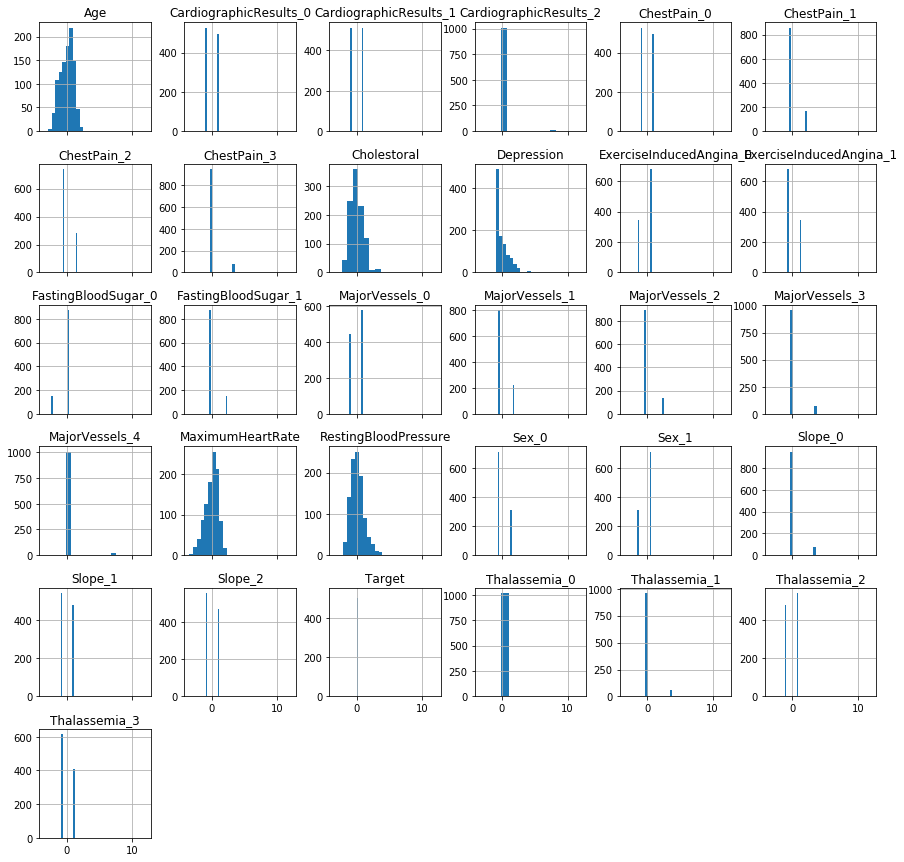

In [14]:
#plot frequency distribution with same scale range
modeldf.hist(figsize=(15,15), sharex=True)

**The dataset is now ready. We can begin with training our models.**

### Predictive Modeling


- Separate the attributes (features used to predict) from the target (outcome to predict)
- Shuffle the order of the rows in the dataset, then separate into a dataset for training (for the model to learn from) and testing (to see how well it predicts with new data)
- Train the model (calculate the attributes' parameters (weights) and sigmoid line shape that best fits the train dataset)


In [15]:
# 'Target' is target variable
y = modeldf['Target']


In [16]:
# attributes are all the columns EXCEPT 'Target'
X = modeldf.drop(['Target'], axis=1)

In [17]:
# separate 80% for training data, 20% for test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Classifier

The `LogisticRegression()` function will take the `X_train` and `y_train` dataset, and calculate the attributes' parameters (weights) and sigmoid line shape that best fits the data.

In [18]:
# assign logistic regression function to variable
model1 = LogisticRegression()

In [19]:
# give training data to learn
model1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
# overall ratio of correct predictions for training data
model1.score(X_train, y_train)

0.8829268292682927

### Evaluate the model on test data
To assess how well the model will perform on new data, we will use the test set to:

Display the ratio of overall correct predictions
Compare the number of correct and incorrect predictions for each target category
Compare the ratio of correct predictions for all actual target values and all predicted values for a category

In [21]:
# overall ratio of correct predictions for test data
model1.score(X_test, y_test)

0.8048780487804879

In [22]:
# generate predictions
y_pred = model1.predict(X_test)

In [23]:
# compare how many items in each category model predicted correctly vs incorrectly

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted: no disease', 'Predicted: disease'],
    index=['Actual: no disease', 'Actual: disease']
)

cm

,Predicted: no disease,Predicted: disease
Actual: no disease,75,27
Actual: disease,13,90


In [24]:
# compare ratio of correct predictions vs all predicted values for each category (precision)
# compare ratio of correct predictions vs all actual values for each category (recall)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       102
           1       0.77      0.87      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



# Decision Tree Classifier

The `DecisionTreeClassifier()` function will take the X_train and y_train dataset, and calculate the attributes' segmented groups and probabilities that best fits the data.

In [25]:
# assign decision tree function to variable
model2 = DecisionTreeClassifier()

In [26]:
# give training data to learn
model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
# overall ratio of correct predictions for training data
model2.score(X_train, y_train)

1.0

#### Evaluate the model on test data

To assess how well the model will perform on new data, we will use the test set to:

- Display the ratio of overall correct predictions
- Compare the number of correct and incorrect predictions for each target category
- Compare the ratio of correct predictions for all actual target values and all predicted values for a category

In [28]:
# overall ratio of correct predictions for test data
model2.score(X_test, y_test)

0.9853658536585366

In [29]:
# generate predictions
y_pred = model2.predict(X_test)

In [30]:
# compare how many items in each category model predicted correctly vs incorrectly

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted: no disease', 'Predicted: disease'],
    index=['Actual: no disease', 'Actual: disease']
)

cm

,Predicted: no disease,Predicted: disease
Actual: no disease,102,0
Actual: disease,3,100


In [31]:
# compare ratio of correct predictions vs all predicted values for each category (precision)
# compare ratio of correct predictions vs all actual values for each category (recall)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



# KNeighbors Classifier

The `KNeighborsClassifier()`looks for the classes of K nearest neighbors of a given data point and based on the majority class, it assigns a class to this data point.

In [32]:
# assign decision tree function to variable
model3 = KNeighborsClassifier()

In [33]:
# give training data to learn
model3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
# overall ratio of correct predictions for training data
model3.score(X_train, y_train)

0.9524390243902439

#### Evaluate the model on test data

To assess how well the model will perform on new data, we will use the test set to:

- Display the ratio of overall correct predictions
- Compare the number of correct and incorrect predictions for each target category
- Compare the ratio of correct predictions for all actual target values and all predicted values for a category

In [35]:
# overall ratio of correct predictions for test data
model3.score(X_test, y_test)

0.8682926829268293

In [36]:
# generate predictions
y_pred = model3.predict(X_test)

In [37]:
# compare how many items in each category model predicted correctly vs incorrectly

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted: no disease', 'Predicted: disease'],
    index=['Actual: no disease', 'Actual: disease']
)

cm

,Predicted: no disease,Predicted: disease
Actual: no disease,87,15
Actual: disease,12,91


In [38]:
# compare ratio of correct predictions vs all predicted values for each category (precision)
# compare ratio of correct predictions vs all actual values for each category (recall)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       102
           1       0.86      0.88      0.87       103

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



# Conclusion

The project involved analysis of the heart disease patient dataset with proper data processing. Then, 3 models were trained and tested with maximum scores as follows:

- Logistic Regression Classifier: 80.4%
- Decision Tree Classifier: 98.5%
- KNeighbors Classifie: 86.8%

## Decision Tree Classifier scored the best score of 98.5% .
